# maxcut
頂点を２つのグループに分けるような辺の切り方のうち、一番最大数のものを探します。イジング問題で解くときには、隣り合う頂点同士がなるべく異なる符号に落ちるようにエネルギー関数の最小値を探していきます。今回、ノード間のエッジの重みは1として固定し、maxcutをときます。

maxcutのコスト関数一般式は、頂点の量子ビットが{-1,1}をとりうるとして、

$$E = -\sum_{i,j}\frac{1}{2}(1-q_iq_j)$$

となります。

## maxcutの例題
例題として5ノード、6エッジの下記のようなグラフを解いてみます。
ノード間のエッジの重みはすべて+1とします。

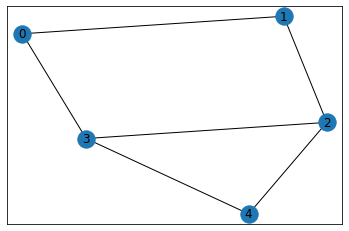

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from blueqat import vqe
from blueqat.pauli import Z

#グラフを作ります。
G = nx.Graph()

#エッジを準備します。
edges = [(0,1),(0,3),(1,2),(2,3),(2,4),(3,4)]
G.add_edges_from(edges)

#描画します
nx.draw_networkx(G)

ノードが等しいとコストが高くなるようになっています。今回は５ノードあるので、コスト関数は下記のように代入できます。

$$
E = -\frac{1}{2}[(1-q_0q_1)+(1-q_0q_3)+(1-q_1q_2)+(1-q_2q_3)+(1-q_3q_4)+(1-q_2q_4)] = \frac{1}{2}(q_0q_1+q_0q_3+q_1q_2+q_2q_3+q_3q_4+q_2q_4)-3
$$

こちらをイジングに入れて計算します。普段はQUBOで{0,1}で計算を行いますが、今回は{-1,1}のまま計算して見ます。手順は、

１，イジングハミルトニアンと呼ばれる式を作ります。  
２，blueqatのQaoaAnsatz機能を使って自動的に組合せ最適化を解く断熱過程を作ります。  
３，こちらを量子古典ハイブリッドで計算します。

(((0, 1, 1, 1, 0), 0.062120159630522406), ((1, 0, 0, 0, 1), 0.062120159630522406), ((1, 1, 1, 0, 0), 0.06212015963052238), ((0, 0, 0, 1, 1), 0.06212015963052238), ((1, 0, 0, 1, 0), 0.05417881420760952), ((0, 1, 1, 0, 1), 0.05417881420760952), ((1, 0, 1, 1, 0), 0.03838887843149049), ((0, 1, 0, 0, 1), 0.03838887843149049), ((1, 1, 0, 1, 0), 0.038388878431490484), ((0, 0, 1, 0, 1), 0.038388878431490484), ((0, 0, 0, 1, 0), 0.034237178224616145), ((1, 1, 1, 0, 1), 0.034237178224616145))


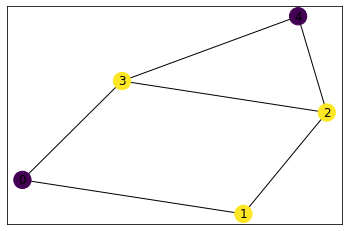

In [12]:
#量子回路を作ります
ansatz = vqe.QaoaAnsatz(sum([Z(i)*Z(j) for i, j in edges]), 1)

#こちらを量子古典ハイブリッド計算で実行します
result = vqe.Vqe(ansatz).run()

print(result.most_common(12))

#計算結果を表示します
nx.draw_networkx(G,node_color = result.most_common()[0][0])

今回はシミュレータを使いました。上記のようにQAOAで複数の解を求めることができました。そして、一番出現確率の高い解についてグラフ上に色分けをしてみました。以上です。